In [1]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 15.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 KB 9.6 MB/s eta 0:00:00
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 14.3 MB/s eta 0:00:00m eta 0:00:010:01:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install -U matplotlib

  Using cached matplotlib-3.10.5-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (8.7 MB)
  Using cached contourpy-1.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (325 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
  Using cached pillow-11.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (6.6 MB)
  Using cached fonttools-4.59.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (4.8 MB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install pandas

  Using cached pandas-2.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.datasets import fetch_california_housing

In [16]:
X, y = fetch_california_housing(return_X_y=True)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [18]:
model = KNeighborsRegressor()

In [19]:
# Make the model learn from our current data
model.fit(X, y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
# Now we can make our predictions of y using X
predictions = model.predict(X)

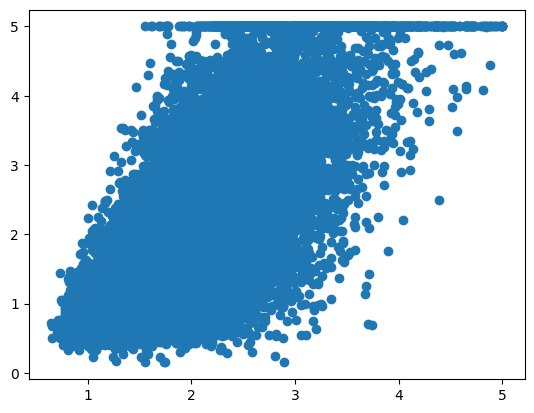

In [21]:
# predictions of house values on x axis and actual house values on y axis 
plt.scatter(predictions, y)

In [29]:
## Using the pipeline to first scale our input and then train this pipeline

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

pipe.fit(X, y)

,steps,"[('scale', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [30]:
prediction = pipe.predict(X)

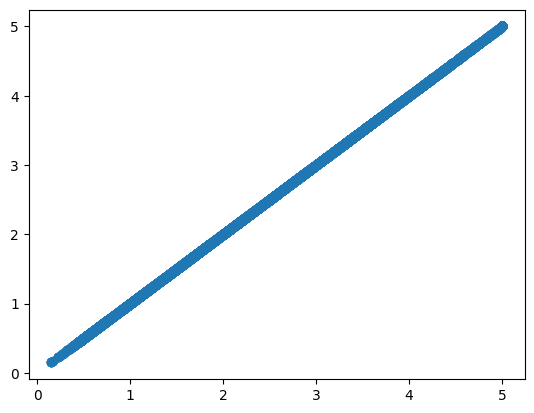

In [31]:
plt.scatter(prediction, y)

In [36]:
## Now we use GridSearch to make our model more accurate ...
## We will try training our model with 1 neighbor for the KNeighbors regressor (i.e. the point itself), then 2, then 3, etc
## Within this, we run 3-fold cross-validation, so split our dataset into 3-folds F1, F2, F3: 
## train on F2, F3, test on F1; train on F1, F3, test on F2; train on F1, F2, test on F3

In [44]:
## This is the general pattern for scikit learn ...
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])

model = GridSearchCV(
    estimator=pipe,
    param_grid={"model__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, 
    cv=3 
) 

In [45]:
model.fit(X, y)
pd.DataFrame(model.cv_results_)
# Here we see for every neighbor value and cross validation split the test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008295,0.000526,0.137895,0.010208,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.007966,0.000234,0.149590,0.012463,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.007723,0.000077,0.160637,0.013146,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.007893,0.000193,0.171866,0.014489,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.007821,0.000207,0.180025,0.014595,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.008772,0.001306,0.187718,0.014365,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.008091,0.000226,0.189364,0.013687,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.008038,0.000107,0.196053,0.013974,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.007814,0.000087,0.200872,0.014214,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.008018,0.000101,0.205719,0.011557,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


In [48]:
print(fetch_california_housing()["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce